# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax 

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [271]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [272]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [273]:
# Create DataFrame from the list of reviews
df = pd.DataFrame({"reviews": reviews})

# Remove the checkmark symbol, "Trip Verified", "Not Verified", and numbers
df['reviews'] = df['reviews'].str.replace(r'✅', '')  # Removes checkmark symbol
df['reviews'] = df['reviews'].str.replace('Trip Verified', '')
df['reviews'] = df['reviews'].str.replace('Not Verified', '')
df['reviews'] = df['reviews'].str.replace(r'\b\d+\b', '')  # Removes sequence of digits
df['reviews'] = df['reviews'].str.split('|').str[1]

# Display the DataFrame
print(df.head())



                                             reviews
0     Overall I would say disappointing. Due to B...
1    LHR to Delhi in Business. Exceptional flight...
2    Efficient and Smooth flight from start to fi...
3   Was told we can not take hand luggage onto th...
4    The flight was comfortable enough but with a...


In [274]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [275]:
pip install wordcloud textblob

Note: you may need to restart the kernel to use updated packages.


In [281]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jae29\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jae29\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jae29\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Unnamed: 0    0
reviews       3
dtype: int64


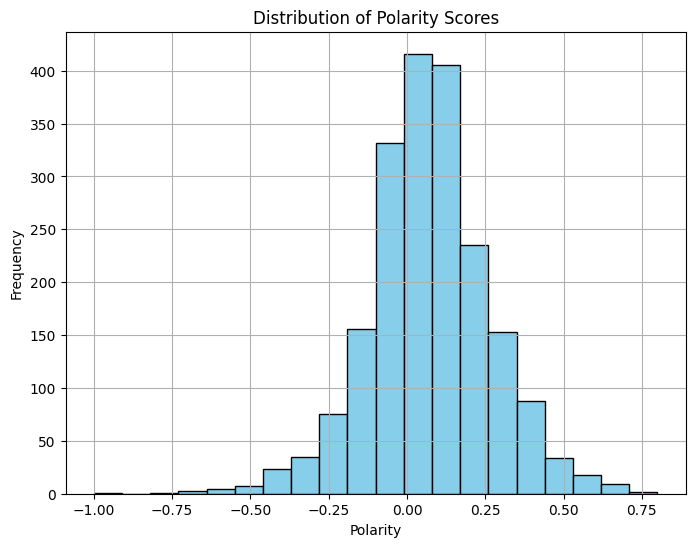

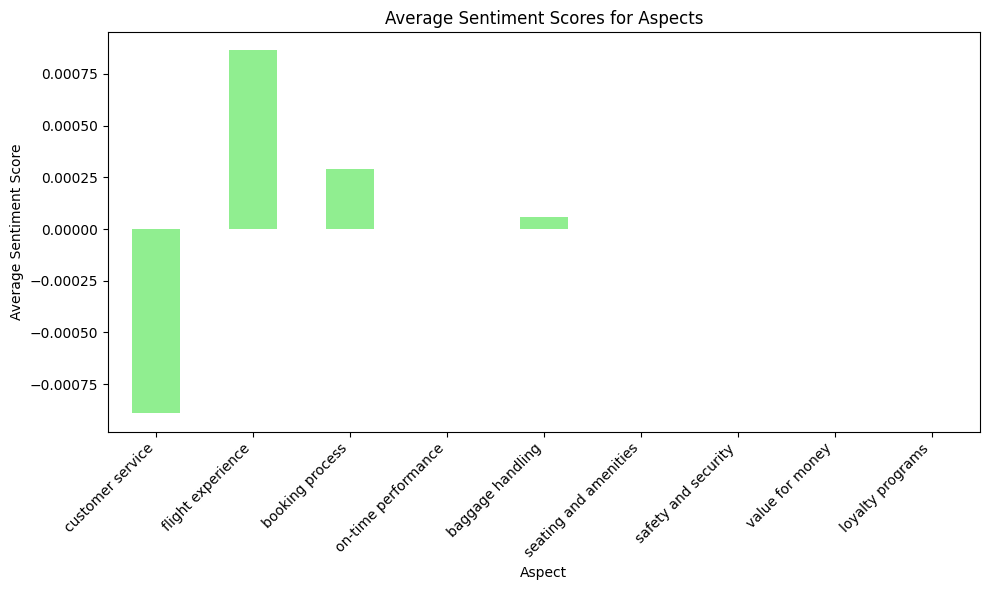

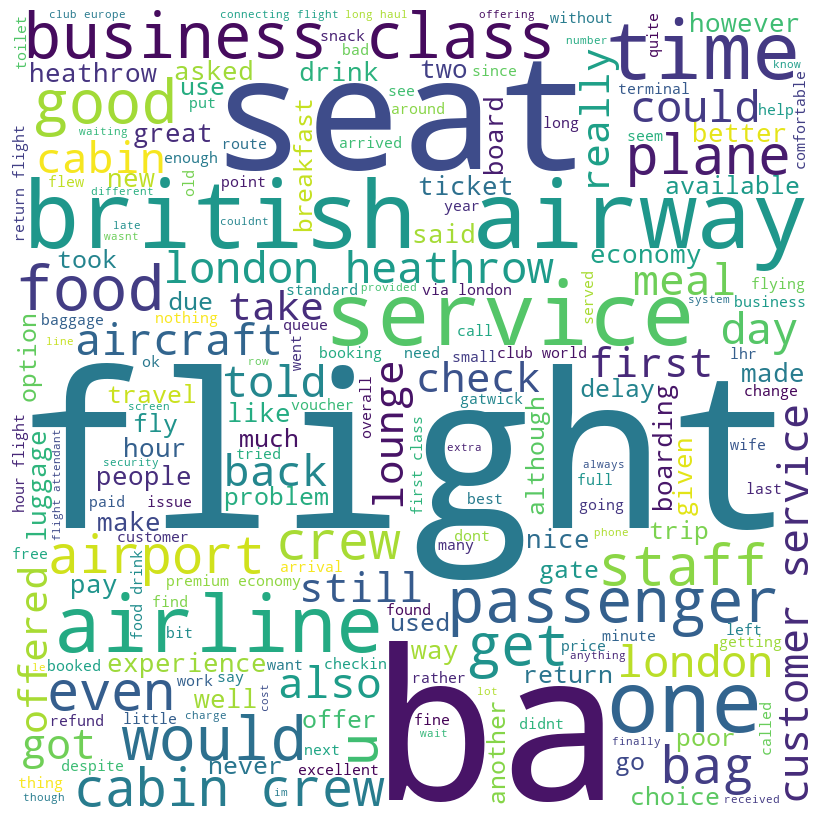

                                        clean_review  dominant_topic
0  overall would say disappointing due ba status ...               4
1  lhr delhi business exceptional flight stylish ...               4
2  efficient smooth flight start finish cabin cre...               4
3  told take hand luggage onto plane overhead cab...               2
4  flight comfortable enough hour delay return le...               4
5  really good flying experience ba travelling yo...               4
6  waited hour checkin paphos business checkin st...               4
7  great experience outset poorly managed bused u...               4
8  boarding difficult caused vast majority passen...               4
9  boarding started delay minute everybody could ...               4
count    1997.000000
mean        0.071206
std         0.195005
min        -1.000000
25%        -0.042769
50%         0.068750
75%         0.184524
max         0.800000
Name: polarity, dtype: float64
0    {'customer service': 0.0, 'flight exp

In [286]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset with specified encoding
df = pd.read_csv("C:/Users/jae29/Documents/BritishAirwaysRepo/data/BA_reviews.csv", encoding='latin1')

# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Define stop words
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

# Apply text cleaning to the 'reviews' column
df['clean_review'] = df['reviews'].apply(clean_text)

# Polarity-based sentiment analysis
def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aspect-based sentiment analysis
def get_aspect_sentiment(text):
    analysis = TextBlob(text)
    # Define aspects to analyze
    aspects = ['customer service', 'flight experience', 'booking process', 'on-time performance', 'baggage handling', 'seating and amenities', 'safety and security', 'value for money', 'loyalty programs']
    aspect_sentiments = {}
    for aspect in aspects:
        aspect_sentiments[aspect] = 0.0
    
    # Calculate sentiment scores for each aspect
    for sentence in analysis.sentences:
        for aspect in aspects:
            if aspect in sentence.string:
                aspect_sentiments[aspect] += sentence.sentiment.polarity
    
    return aspect_sentiments

# Add sentiment analysis to the dataframe
df['polarity'] = df['clean_review'].apply(get_polarity)
df['aspect_sentiments'] = df['clean_review'].apply(get_aspect_sentiment)

# Visualization for polarity-based sentiment analysis
plt.figure(figsize=(8, 6))
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Aggregate sentiment scores for each aspect
aspect_sentiment_df = pd.DataFrame(df['aspect_sentiments'].tolist())
aspect_sentiment_agg = aspect_sentiment_df.mean()

# Visualization for aspect-based sentiment analysis
plt.figure(figsize=(10, 6))
aspect_sentiment_agg.plot(kind='bar', color='lightgreen')
plt.title('Average Sentiment Scores for Aspects')
plt.xlabel('Aspect')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Topic modeling
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_review'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(tfidf)

# Wordcloud
def plot_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# Combine all reviews into a single text
all_reviews = ' '.join(df['clean_review'])
plot_wordcloud(all_reviews)

# Display the most dominant topic for each review
df['dominant_topic'] = lda_output.argmax(axis=1)
print(df[['clean_review', 'dominant_topic']].head(10))

# Distribution of polarity
print(df['polarity'].describe())

# Display aspect-based sentiment analysis
print(df['aspect_sentiments'].head(10))

# Distribution of dominant topics
print(df['dominant_topic'].value_counts())

print(aspect_sentiment_agg)

print(df['polarity'].describe())

In [279]:
# Define the path for the new CSV file
output_file = "C:/Users/jae29/Documents/BritishAirwaysRepo/data/cleaned_BA_reviews.csv"

# Export the cleaned DataFrame to a new CSV file
df.to_csv(output_file, index=False)

print("Cleaned data exported to:", output_file)

Cleaned data exported to: C:/Users/jae29/Documents/BritishAirwaysRepo/data/cleaned_BA_reviews.csv
